In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\kucha\AppData\Local\Temp\ipykernel_24448\600834044.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df['State'].head()

0      New York
1    California
2       Florida
3      New York
4       Florida
Name: State, dtype: object

In [7]:
# perform lable encoding on State column
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
df["State"].unique()

array([2, 0, 1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


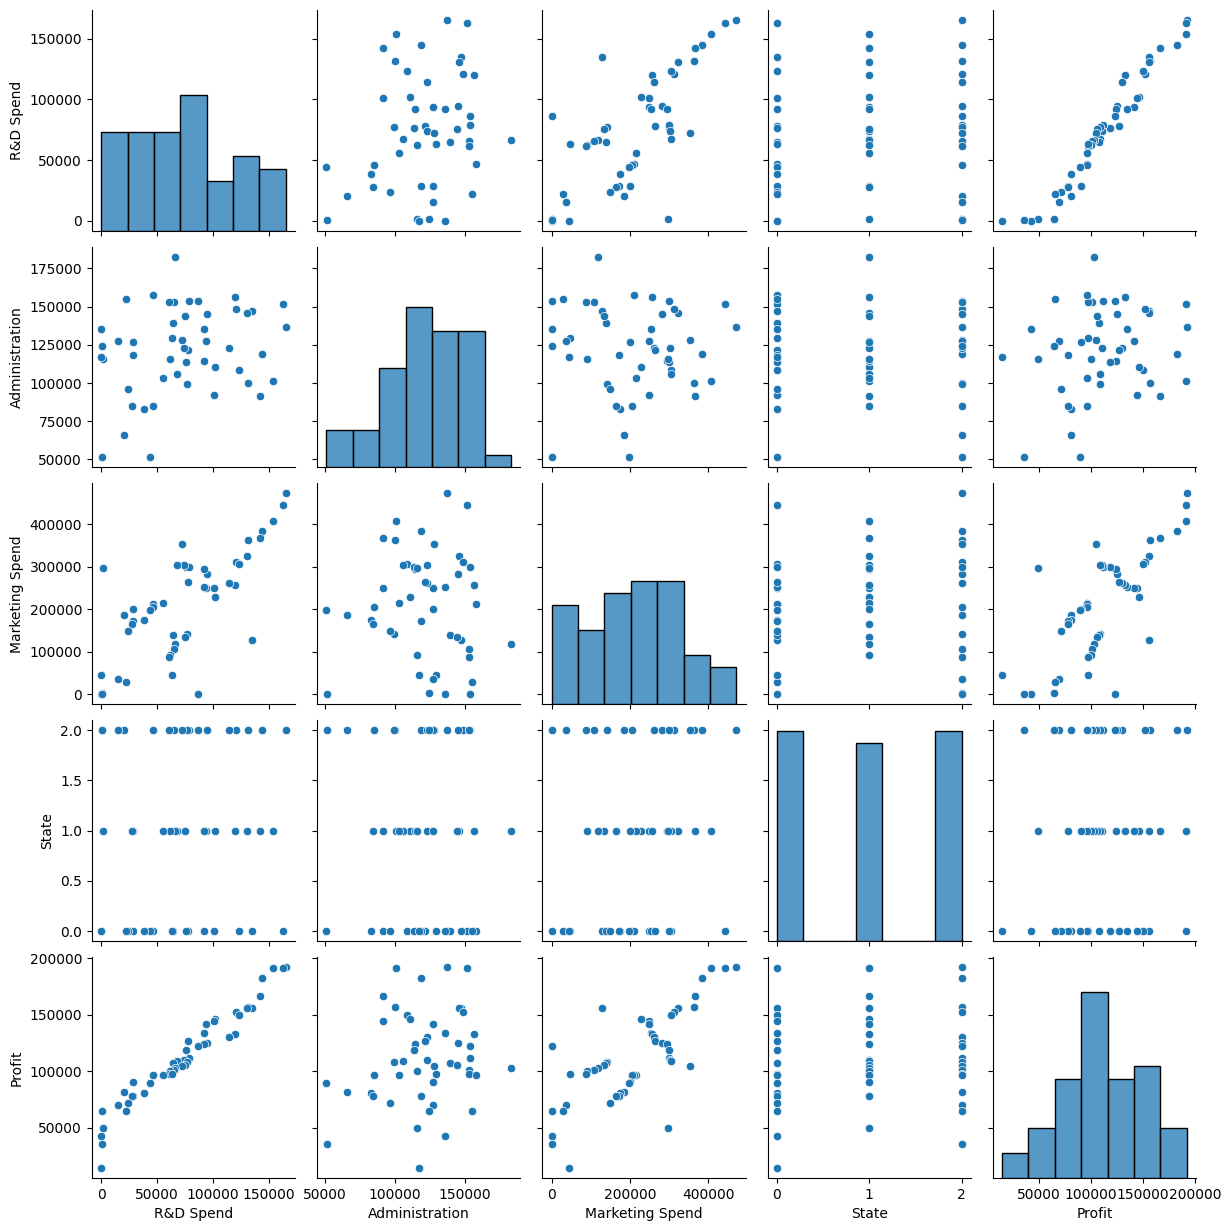

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


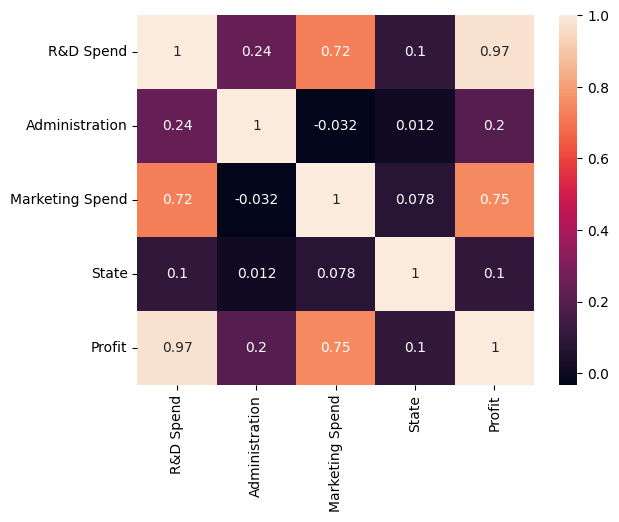

In [14]:
sns.heatmap(df.corr() , annot = True)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [16]:
# Divide the dataset X and y for ml model
X = df.drop('Profit', axis =1)
y =df['Profit']

In [17]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [18]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [19]:
#Another way to divide the dataset in X and y
X = df.iloc[:,:-1]
y = df.iloc[: , -1]

In [20]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [23]:
from sklearn.model_selection import  train_test_split

In [25]:
X_train ,X_test , y_train ,y_test = train_test_split(X ,y, test_size =0.30 , random_state =1)

In [27]:
df.shape

(50, 5)

In [28]:
X_train.shape , X_test.shape

((35, 4), (15, 4))

In [29]:
y_train.shape , y_test.shape

((35,), (15,))

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train

,R&D Spend,Administration,Marketing Spend,State
42,23640.93,96189.63,148001.11,0
49,0.00,116983.80,45173.06,0
26,75328.87,144135.98,134050.07,1
22,73994.56,122782.75,303319.26,1
13,91992.39,135495.07,252664.93,0
41,27892.92,84710.77,164470.71,1
17,94657.16,145077.58,282574.31,2
45,1000.23,124153.04,1903.93,2
24,77044.01,99281.34,140574.81,2
23,67532.53,105751.03,304768.73,1


In [35]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.25372808, -1.07623904, -0.59653789, -1.07040953],
       [-1.78039771, -0.26331141, -1.47322907, -1.07040953],
       [-0.10223074,  0.79817638, -0.71548164,  0.22146404],
       [-0.13195633, -0.03660716,  0.72767328,  0.22146404],
       [ 0.26899704,  0.4603685 ,  0.2958047 , -1.07040953],
       [-1.15900279, -1.52499379, -0.45612141,  0.22146404],
       [ 0.32836244,  0.8349873 ,  0.55080603,  1.51333761],
       [-1.75811471,  0.01696298, -1.84213293,  1.51333761],
       [-0.06402107, -0.95537168, -0.65985302,  1.51333761],
       [-0.27591661, -0.70244551,  0.74003117,  0.22146404],
       [ 1.38545151, -1.26380666,  1.26351252,  0.22146404],
       [-0.54411056, -0.8077468 , -0.02843242,  0.22146404],
       [ 0.89168251,  1.28338942,  0.32861188,  0.22146404],
       [-0.39929258, -0.31579591, -1.08139891,  0.22146404],
       [ 0.4900089 , -0.51311006,  0.09541451,  0.22146404],
       [-0.30891036,  2.30367055, -0.85105777,  0.22146404],
       [-1.28632484,  1.

In [36]:
X_test = scaler.transform(X_test)
X_test

C:\Users\kucha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[7.21076000e+04, 1.27864550e+05, 3.53183810e+05, 2.00000000e+00],
       [4.60140200e+04, 8.50474400e+04, 2.05517640e+05, 2.00000000e+00],
       [2.87543300e+04, 1.18546050e+05, 1.72795670e+05, 6.34413157e-17],
       [2.02295900e+04, 6.59479300e+04, 1.85265100e+05, 2.00000000e+00],
       [1.53441510e+05, 1.01145550e+05, 4.07934540e+05, 1.00000000e+00],
       [1.44372410e+05, 1.18671850e+05, 3.83199620e+05, 2.00000000e+00],
       [5.42050000e+02, 5.17431500e+04, 1.58603289e-18, 2.00000000e+00],
       [6.56054800e+04, 1.53032060e+05, 1.07138380e+05, 2.00000000e+00],
       [1.31546000e+03, 1.15816210e+05, 2.97114460e+05, 1.00000000e+00],
       [6.11363800e+04, 1.52701920e+05, 8.82182300e+04, 2.00000000e+00],
       [6.34088600e+04, 1.29219610e+05, 4.60852500e+04, 6.34413157e-17],
       [3.85585100e+04, 8.29820900e+04, 1.74999300e+05, 6.34413157e-17],
       [7.83894700e+04, 1.53773430e+05, 2.99737290e+05, 2.00000000e+00],
       [2.86637600e+04, 1.27056210e+05, 2.01126820e

In [37]:
#Training of model
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model

LinearRegression()

In [40]:
model.fit(X_train ,y_train)

LinearRegression()

In [42]:
model.coef_

array([34609.52831391,  -361.81275373,  4071.57025242,  -180.72707809])

In [43]:
model.intercept_

116538.2502857143

In [46]:
y_pred_train = model.predict(X_train)
y_pred_train

array([ 71301.31588557,  49209.89122579, 109758.14395729, 114907.29733318,
       127079.38524634,  75080.31776881, 129569.75486494,  47910.71731637,
       111708.03795471, 110216.12473054, 170049.79027689,  97843.30442734,
       148232.55657579,  98390.16523871, 134031.33944355, 101508.34502123,
        65190.01810221,  90179.18692528, 128426.72861552, 116847.27737697,
       101969.90934032, 155439.98982729, 158710.71441641,  47380.90872753,
       187931.67369005, 116903.05566403, 190759.01550399, 144483.04646729,
       161694.4324125 , 134288.37593715, 153440.673345  , 150484.59274652,
       128306.3234922 ,  60216.58708493,  89389.76305774])

In [49]:
y_pred = model.predict(X_test)
y_pred

array([3.88747587e+09, 2.39864797e+09, 1.65594857e+09, 1.43071181e+09,
       6.93499303e+09, 6.51406437e+09, 1.54940031e+05, 2.65154338e+09,
       1.21346242e+09, 2.41995467e+09, 2.33555330e+09, 2.01710635e+09,
       3.87790300e+09, 1.76508699e+09, 2.93551787e+09])

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:

print("mse for test data", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mse for train data", mean_squared_error(y_train, y_pred_train))

mse for test data 3334920675.1725307
mse for train data 82336070.96231787


In [52]:
print("rmse for test data", mean_squared_error(y_test, y_pred))
print("rmse for train data", np.sqrt(mean_squared_error(y_train, y_pred_train)))

rmse for test data 1.1121695909693209e+19
rmse for train data 9073.922578593994
